# Step 1 EDA, sorting out, some cleaning...


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Openning data set
houses = r"C:\Users\nonox\University\City\First semestre\ML\Coursework\Data\train.csv"
houses = houses.replace("\\","/")
houses = pd.read_csv(houses)
print(houses.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
 # Check data types
print(houses.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64


In [3]:
# Quick view on column names
print(houses.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Statistics for the target variable.

print(houses['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


## Missing Values.


In [5]:

# Create a list with missing values (if any)
missing_values = houses.columns[houses.isnull().any()]

# Colunns' names with missing values as well as counting the total amount of them for each column.
print(houses[missing_values].isnull().sum().sort_values(ascending=False))
houses.shape

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


(1460, 81)

           Since we have 80 columns and columns with the highest % of missing values are not that important, 
           any column with a percentage of missing values higher than 7% will be removed.

In [6]:
# % of missing values for each column:
missing_percentage = houses.isnull().mean() * 100

# Excluding columns with a missing % higher than 7% and keep the others using .index
final_columns = missing_percentage[missing_percentage <= 7].index 

# Cleaned dataset
houses1 = houses[final_columns]

print(missing_percentage)

# source: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [7]:
# Checking missing values again
missing_values = houses1.columns[houses1.isnull().any()]

print(houses1[missing_values].isnull().sum().sort_values(ascending=False))
houses.shape

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64


(1460, 81)

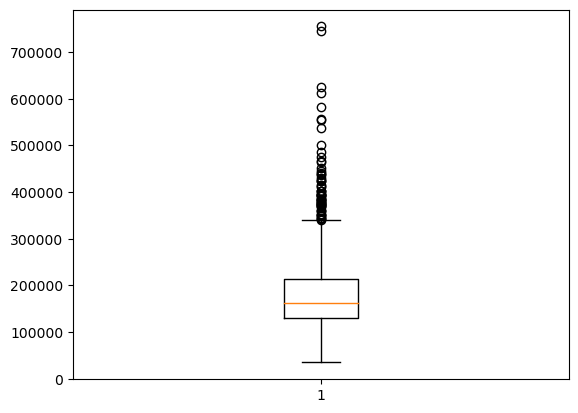

In [8]:
# Checking for outliers in price column
plt.boxplot(houses['SalePrice'])
plt.show()

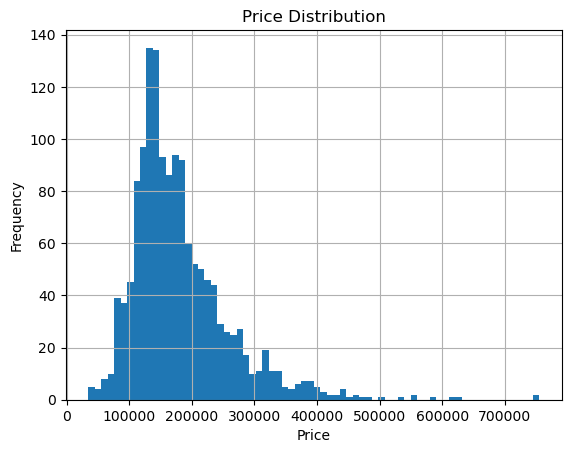

In [9]:
# Checking price's distribution through a histogram
houses['SalePrice'].hist(bins=70)

# Labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [10]:
# Checking for correlations related to our target variable (prices)
# Calculate house correlations
house_corr = houses1.corr()

# Select correlations for SalePrice, order the figures
sale_price_corr = house_corr['SalePrice'].sort_values(ascending=False)
print(sale_price_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


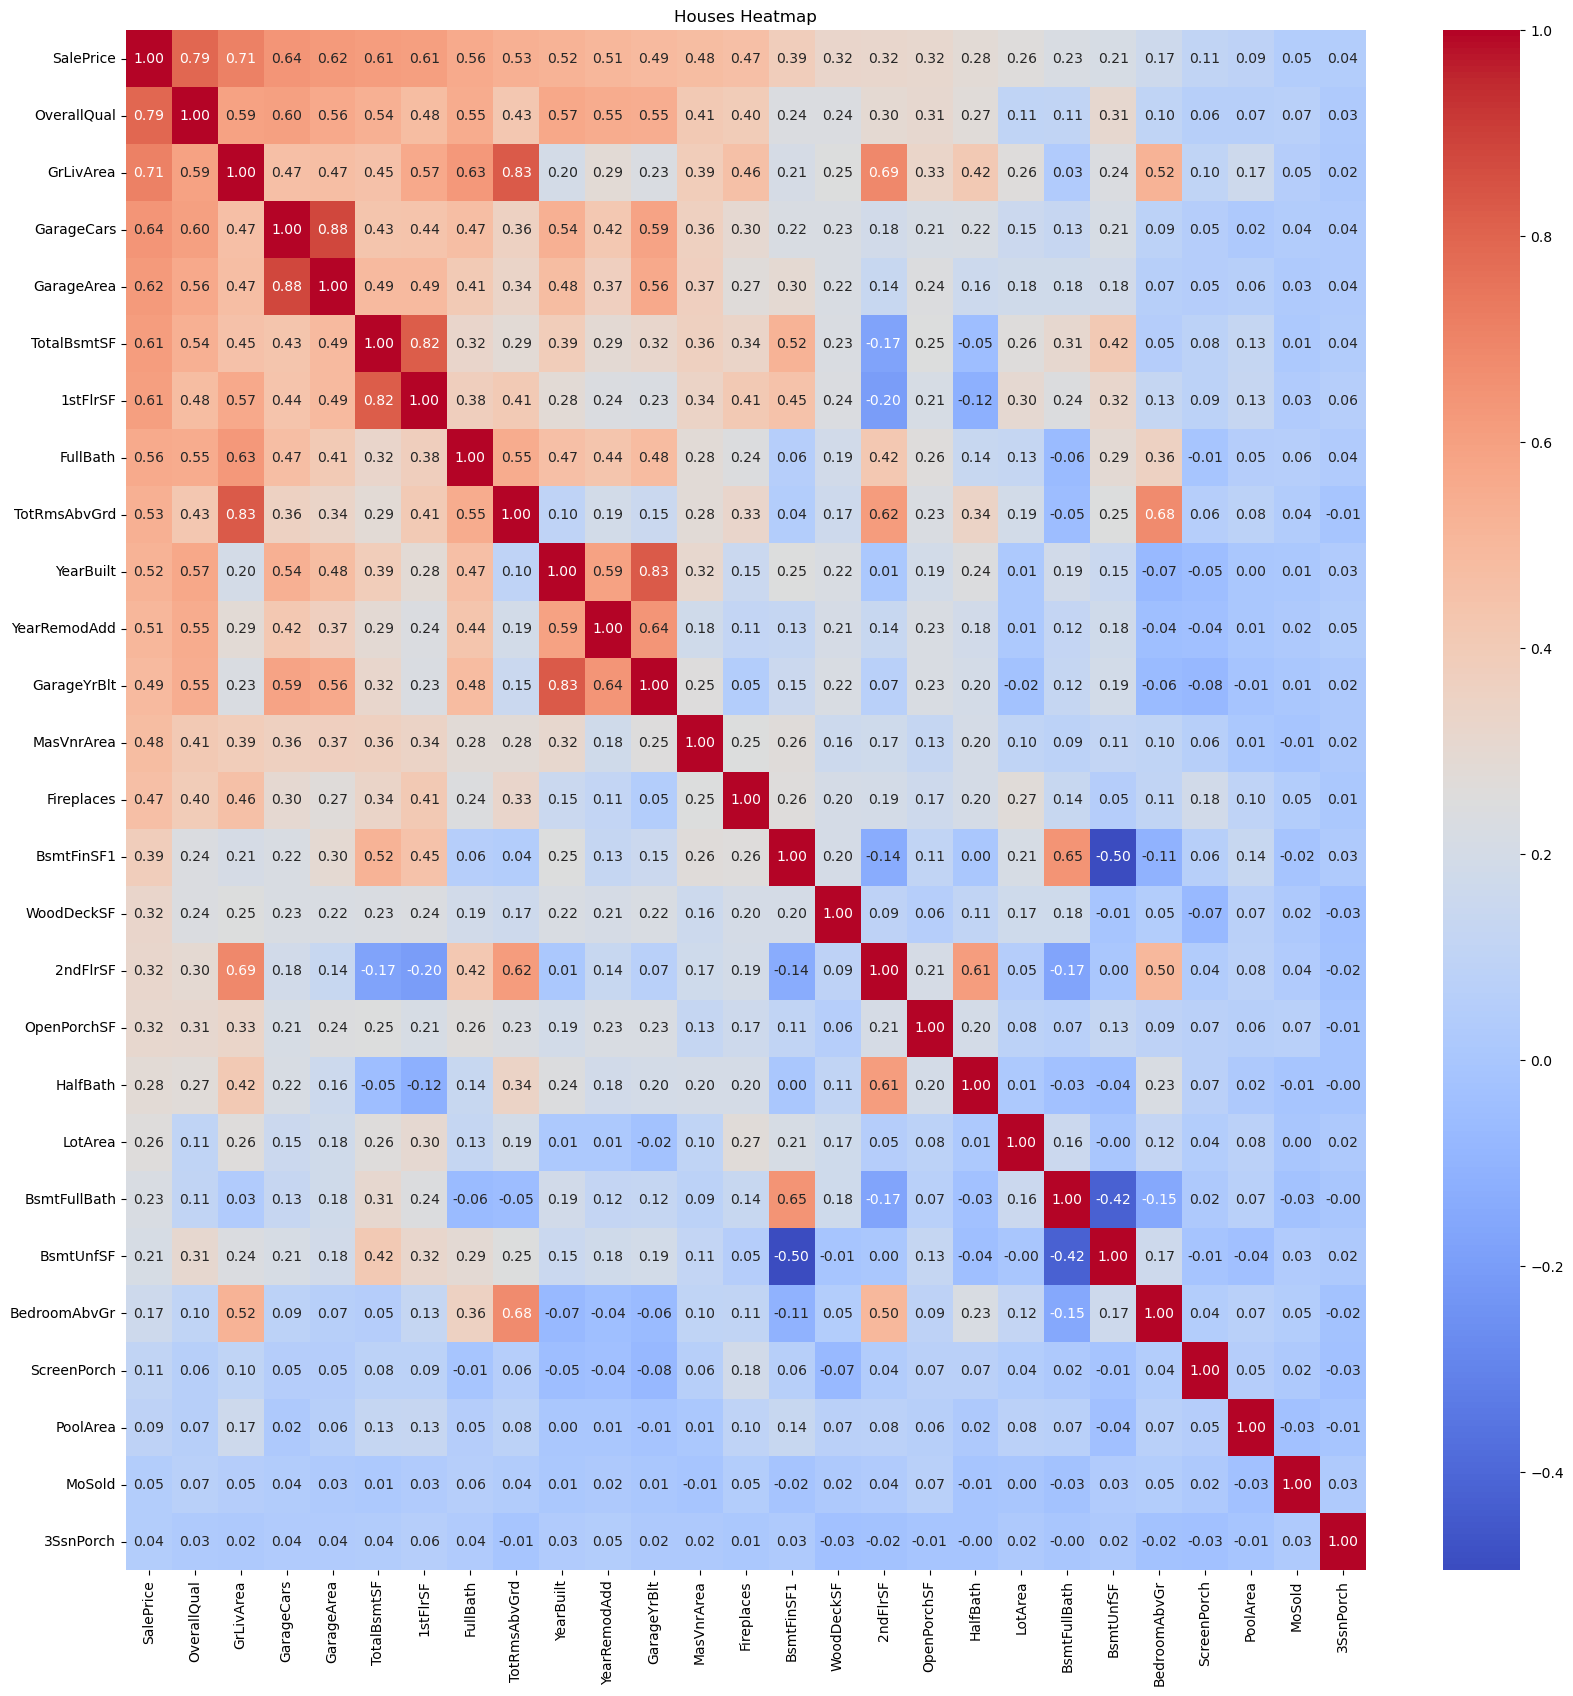

In [17]:
# Creation of heatmap with all positive correlations.
# Columns to consider part 1
columns = [ 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
    'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 
    'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 
    'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 
    'PoolArea', 'MoSold', '3SsnPorch'
          ]

# Correlation Matrix
houses_corr = houses1[columns].corr()

# Creating the heat map
plt.figure(figsize=(20,20)) 
sns.heatmap(houses_corr, annot=True, fmt=".2f", cmap='coolwarm')

# Labelling
plt.title('Houses Heatmap')

plt.show()

In [18]:
# Checking categorical data
# Filtering categorical data
categorical_columns = houses1.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


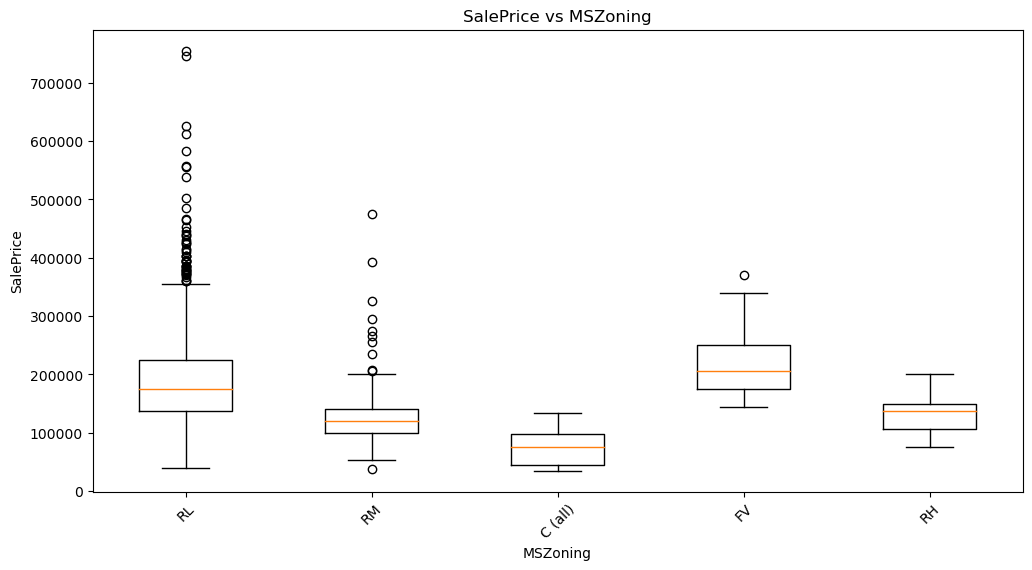

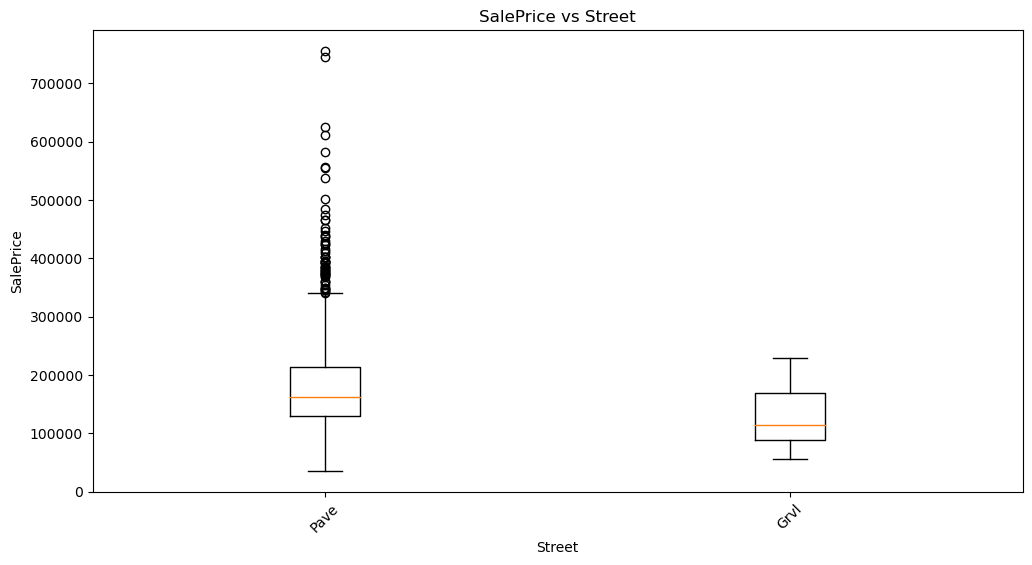

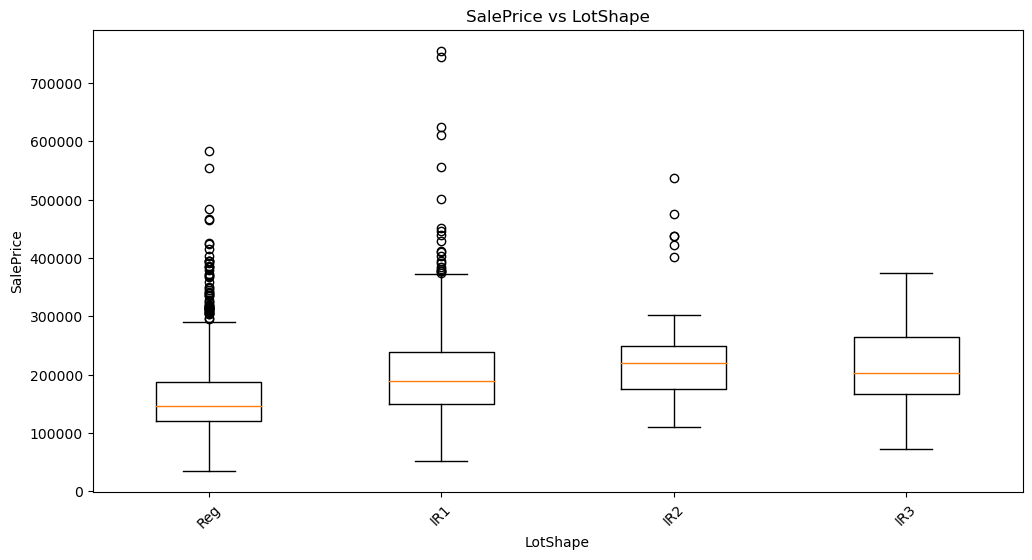

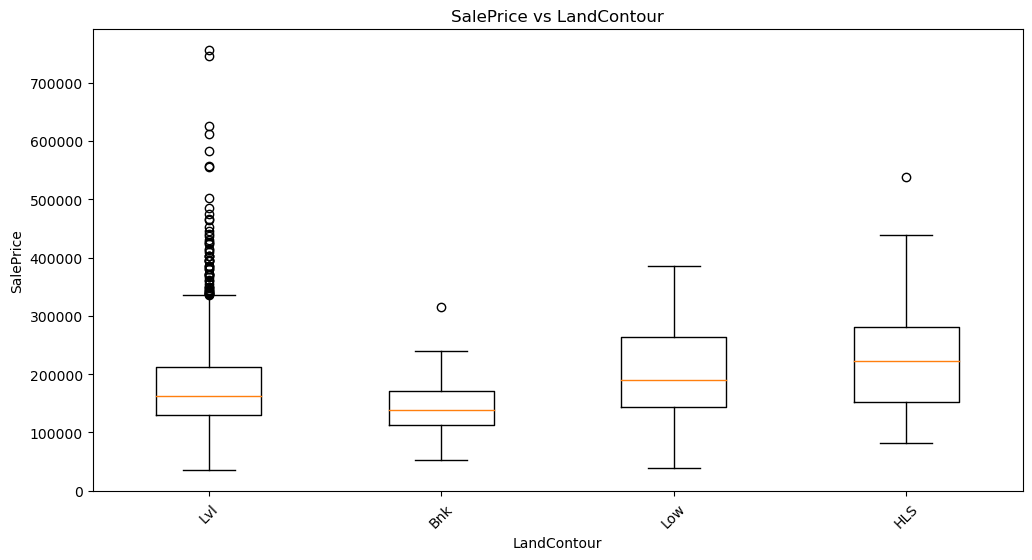

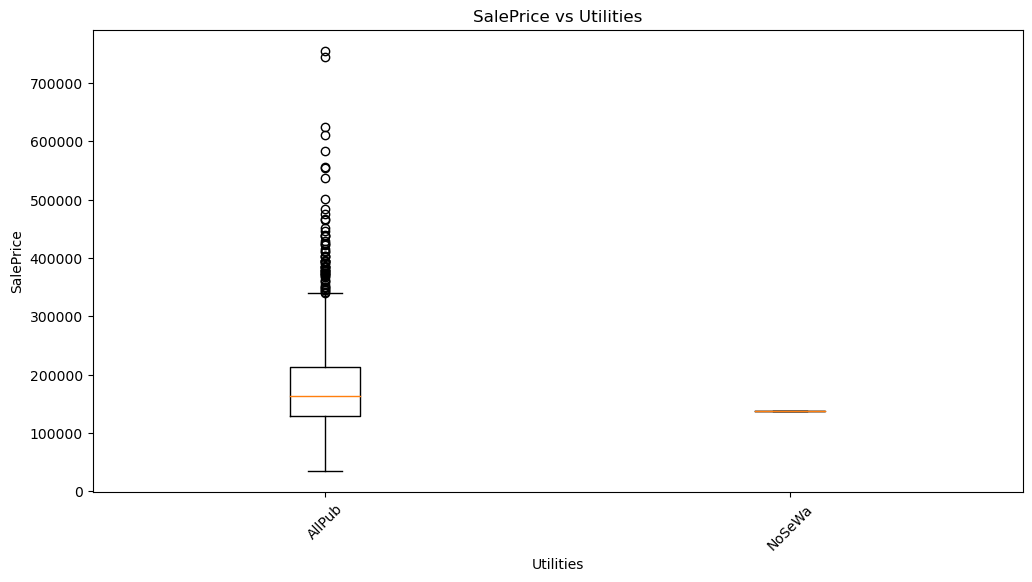

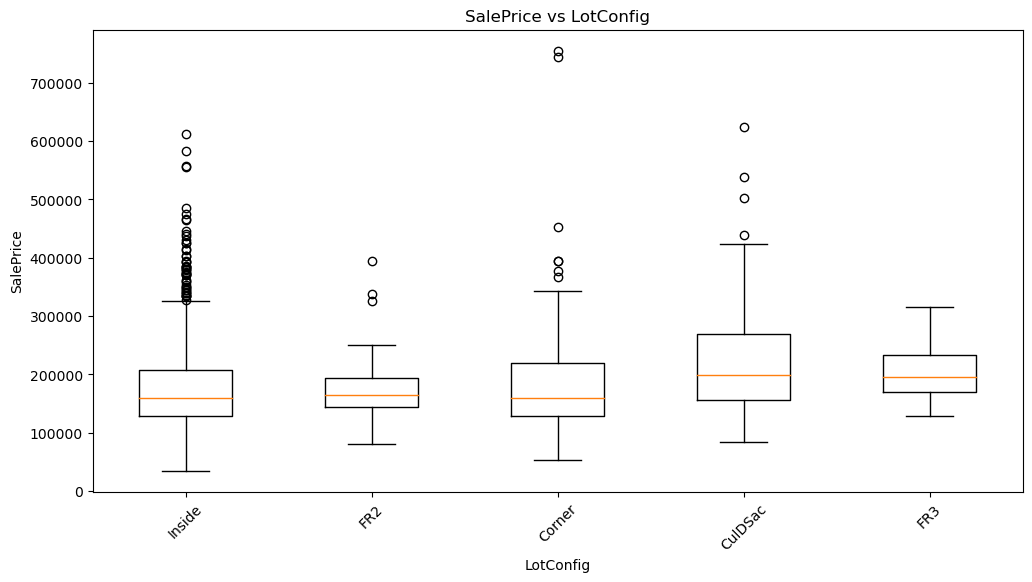

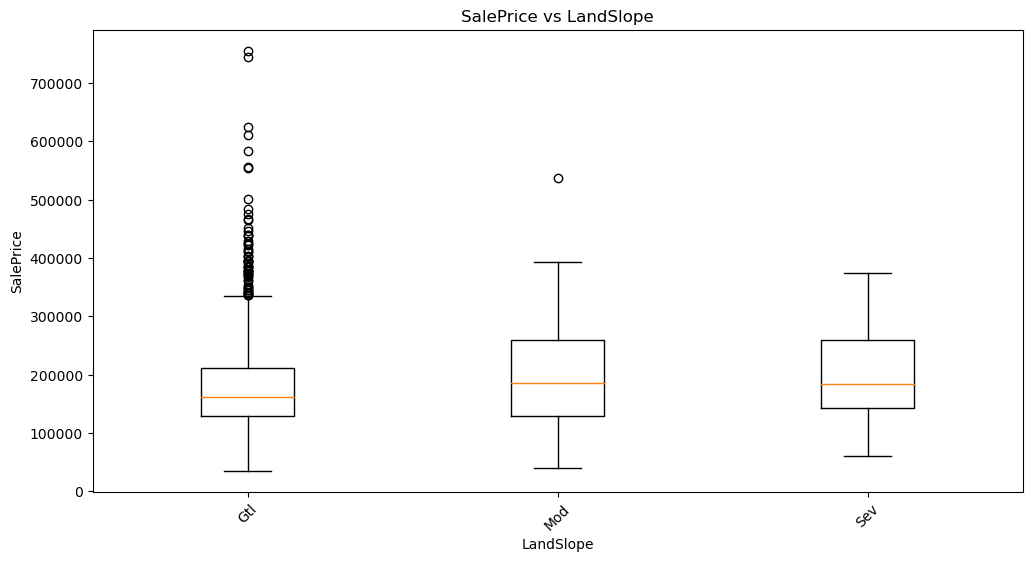

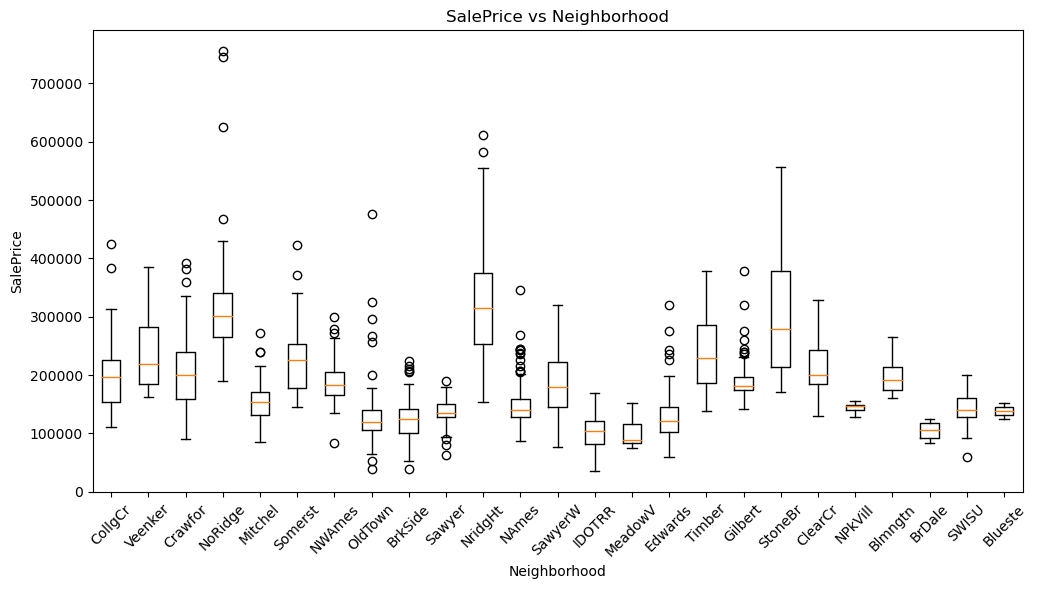

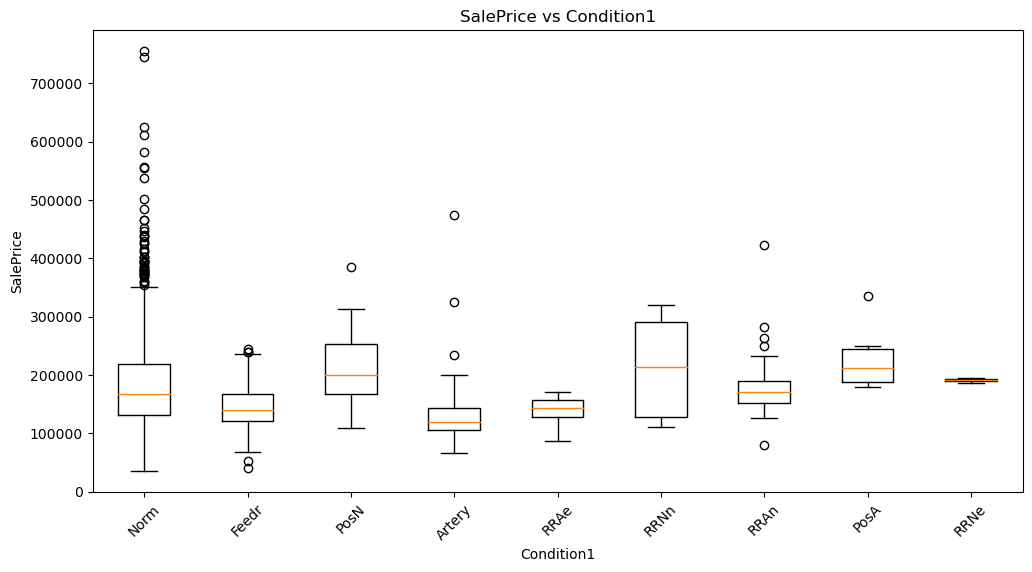

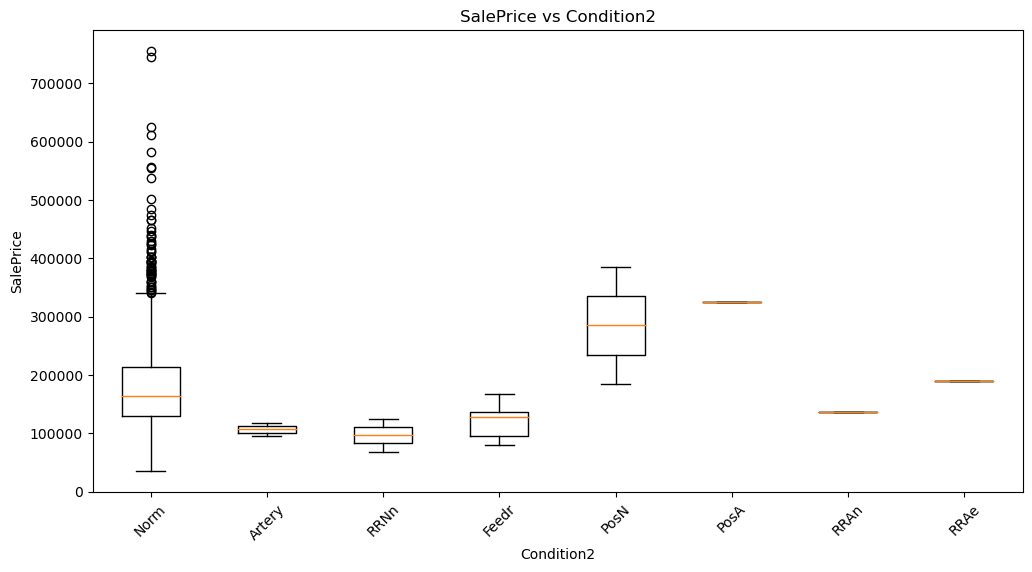

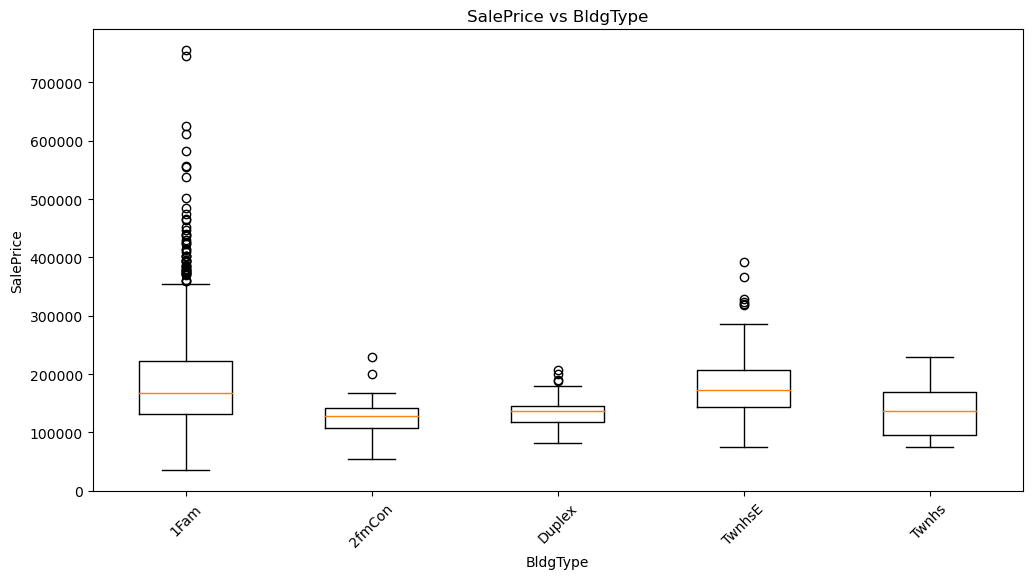

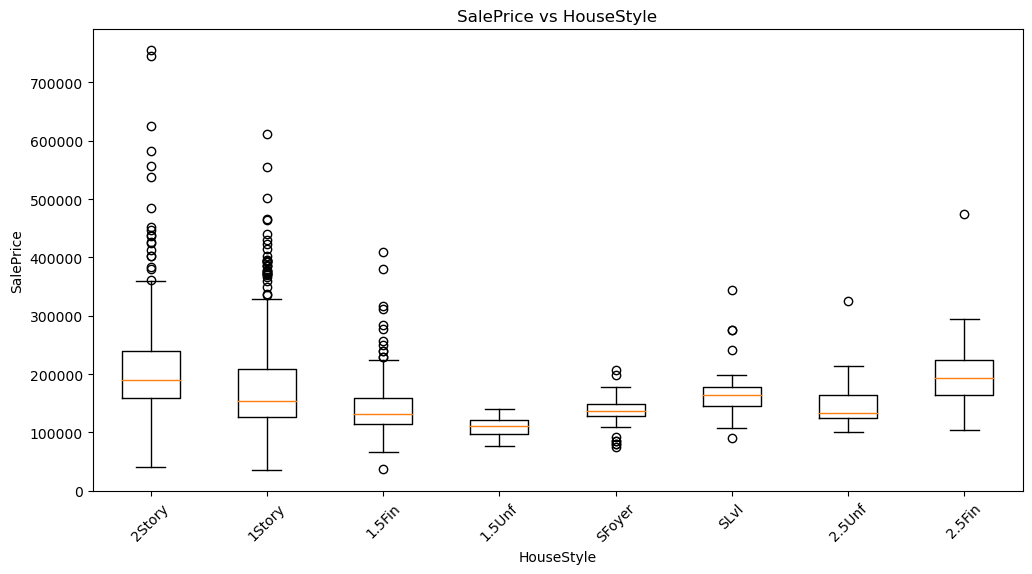

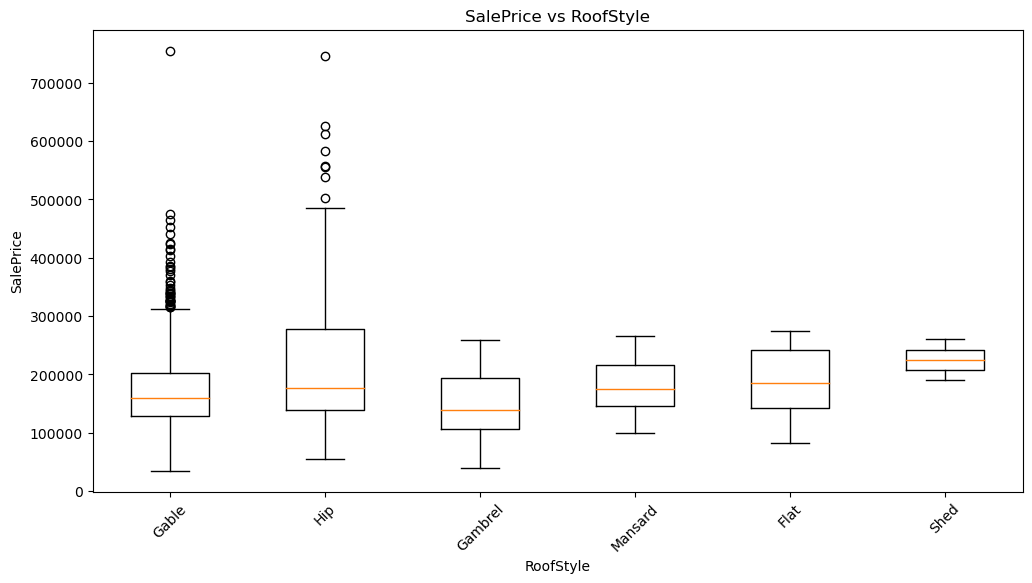

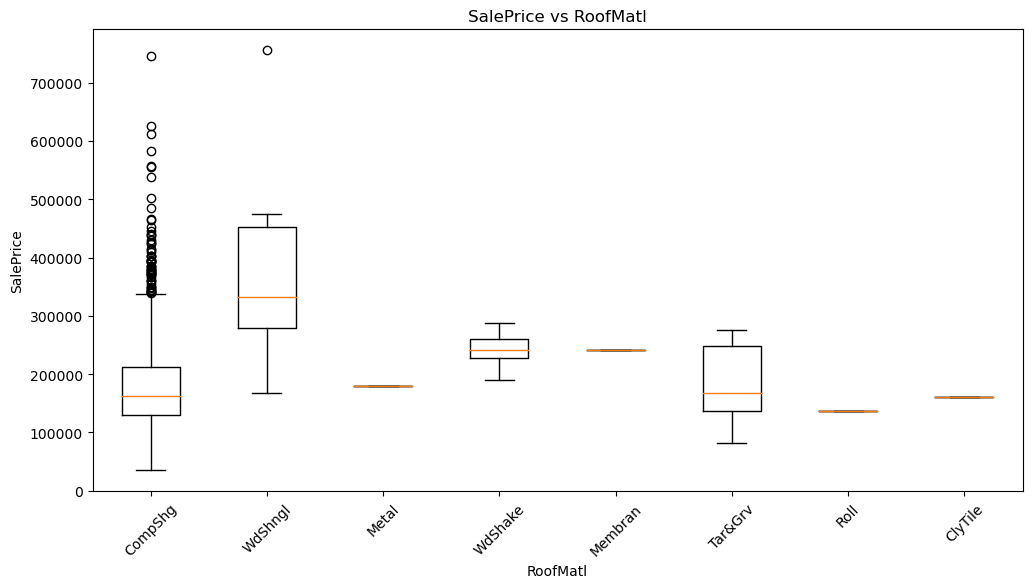

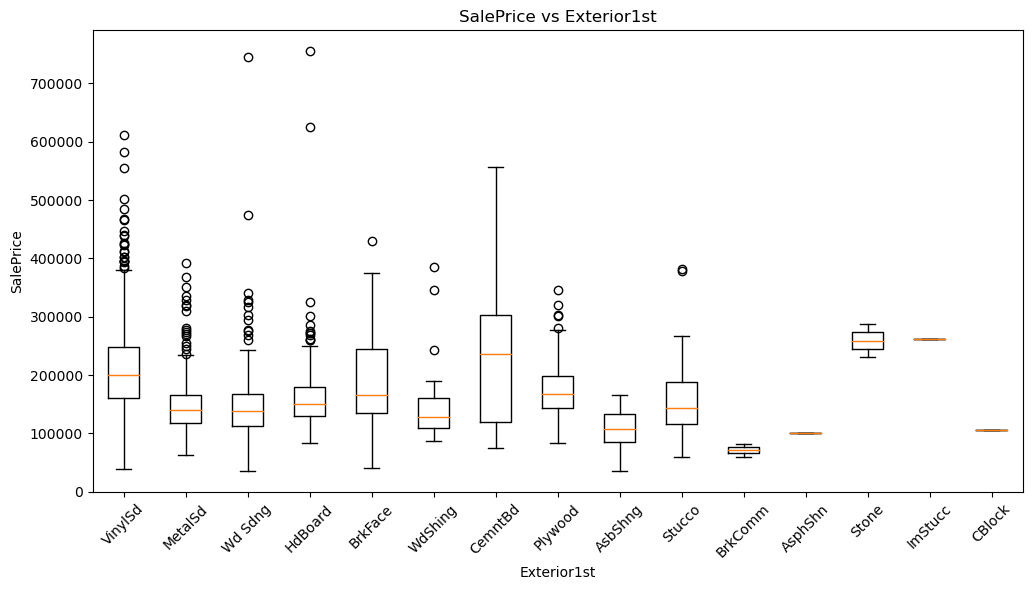

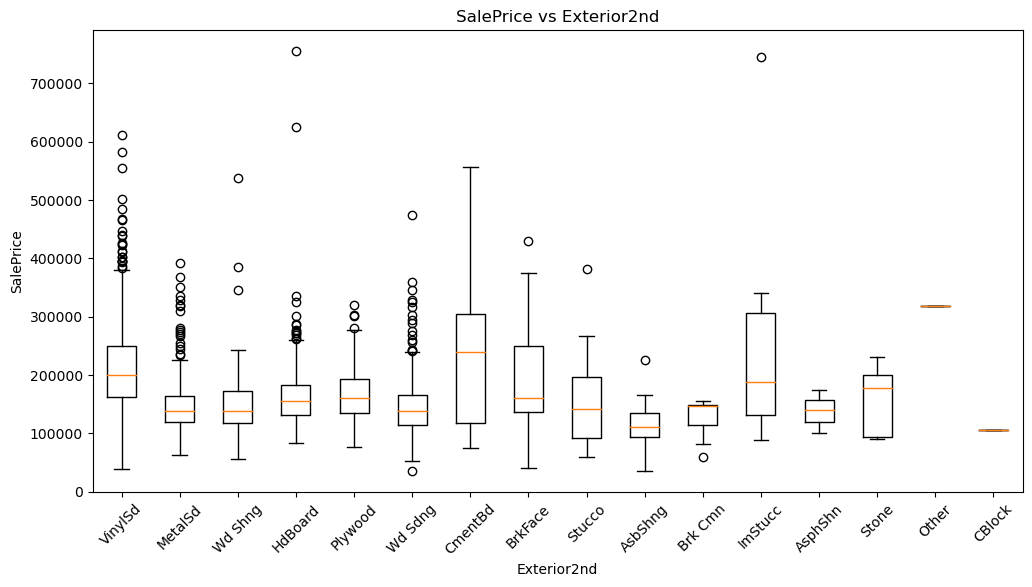

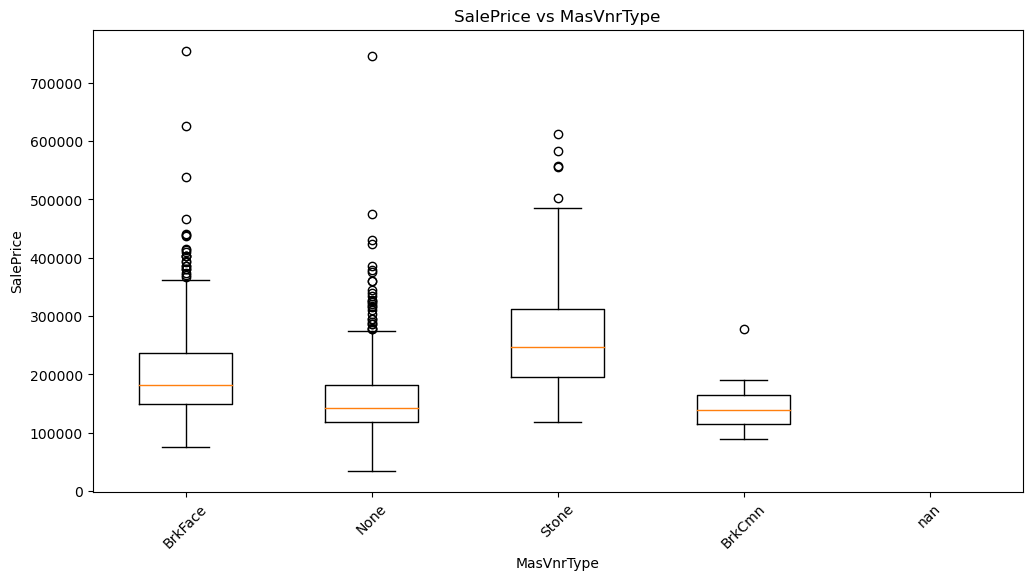

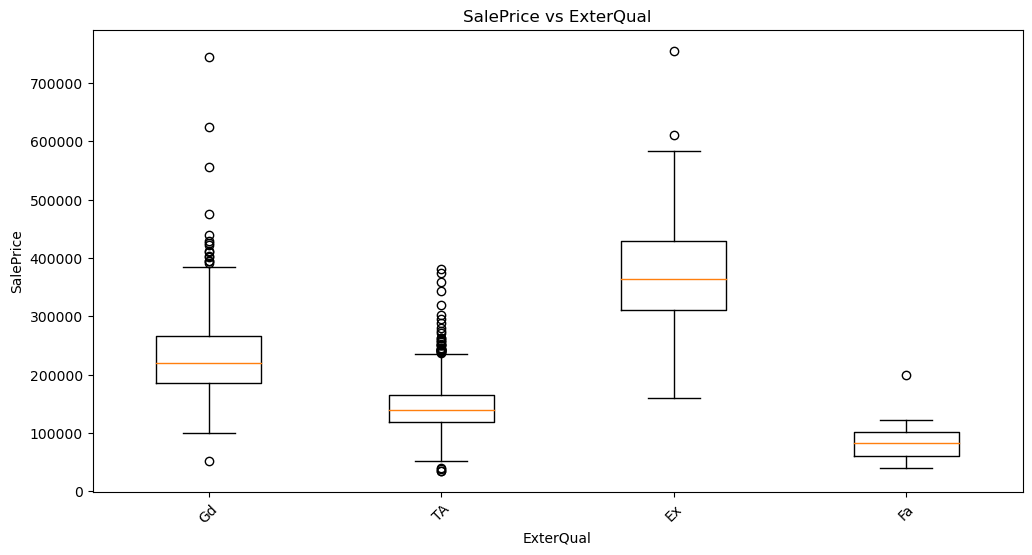

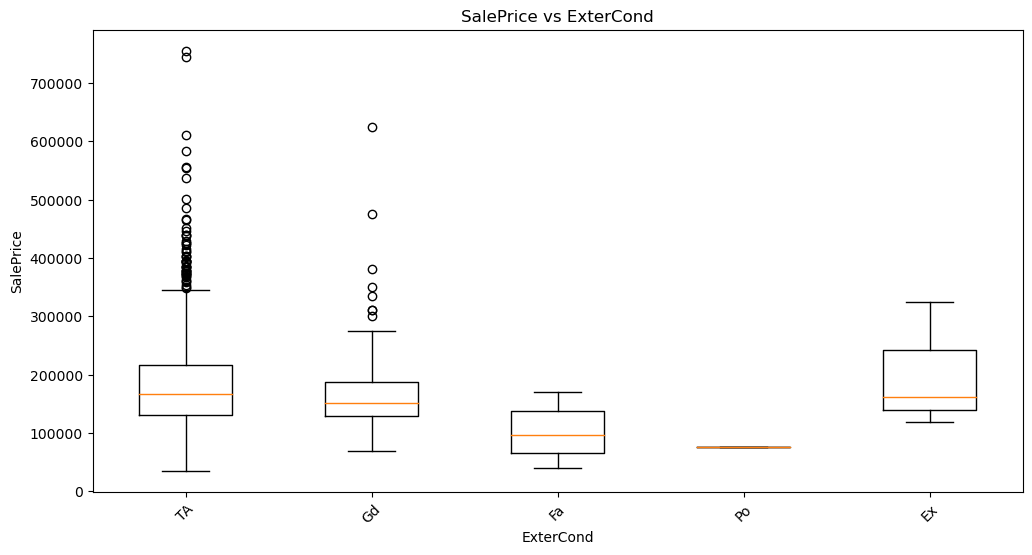

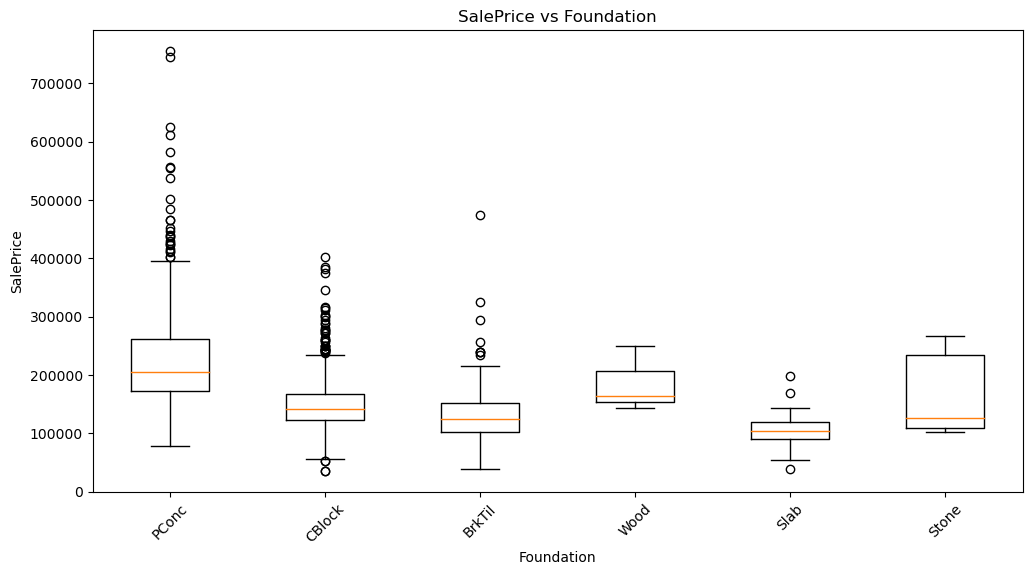

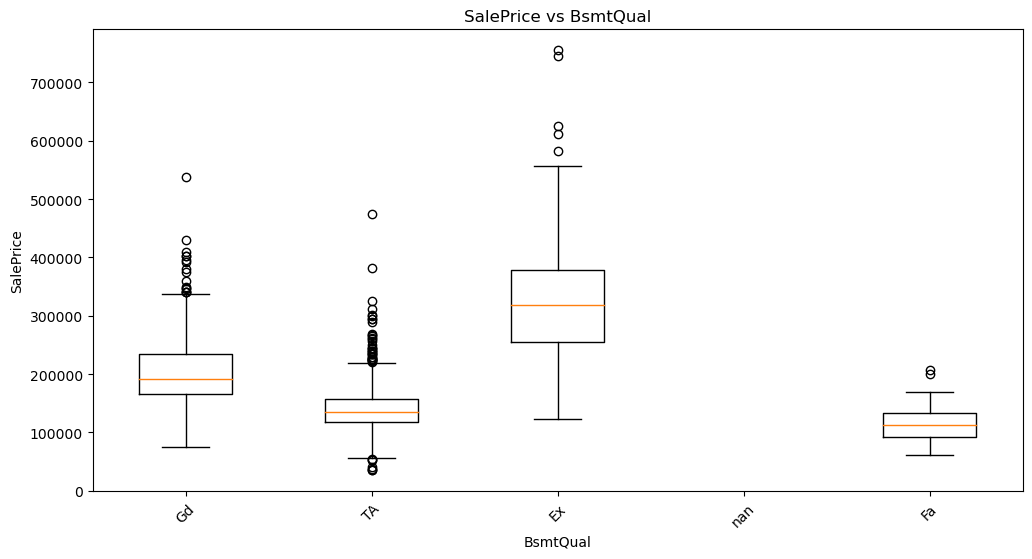

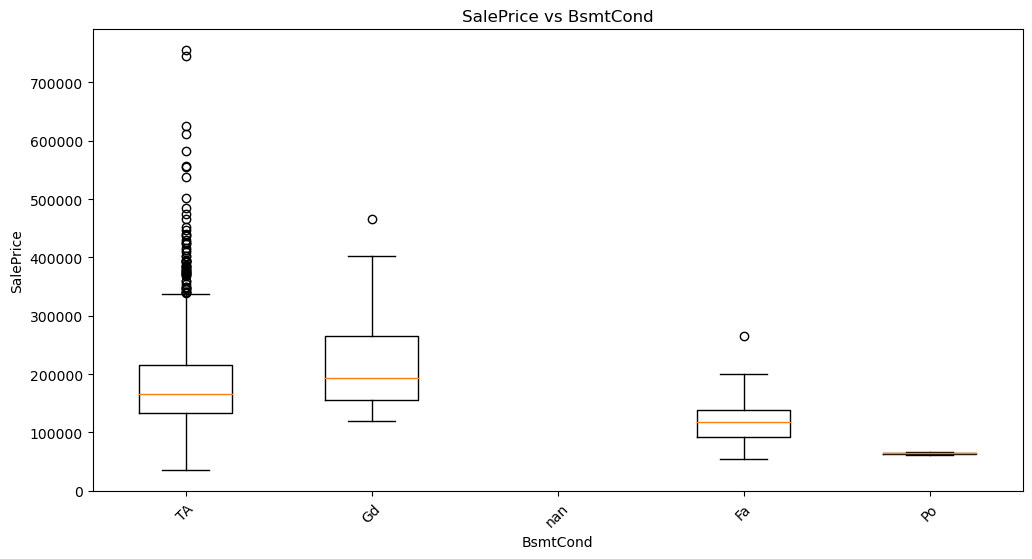

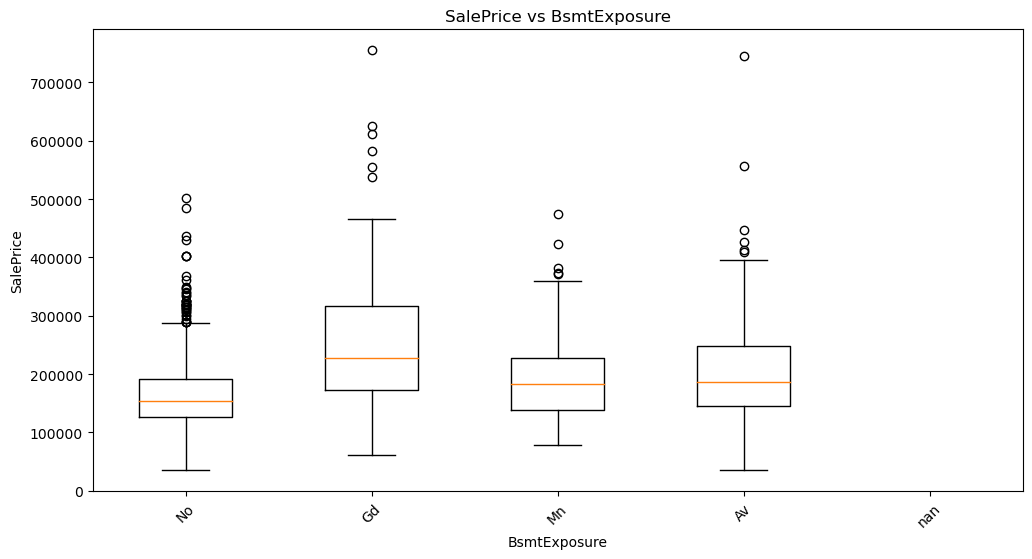

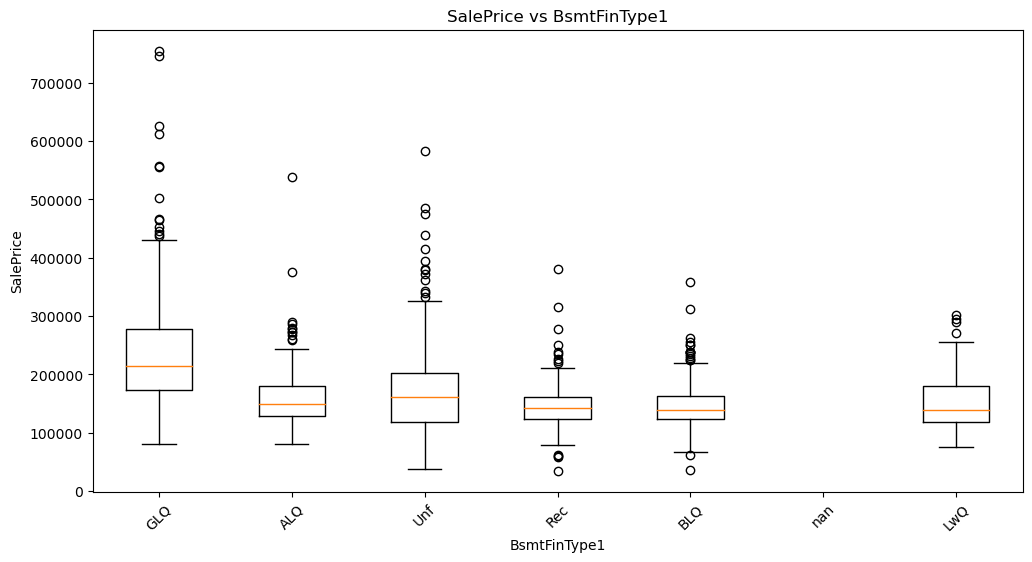

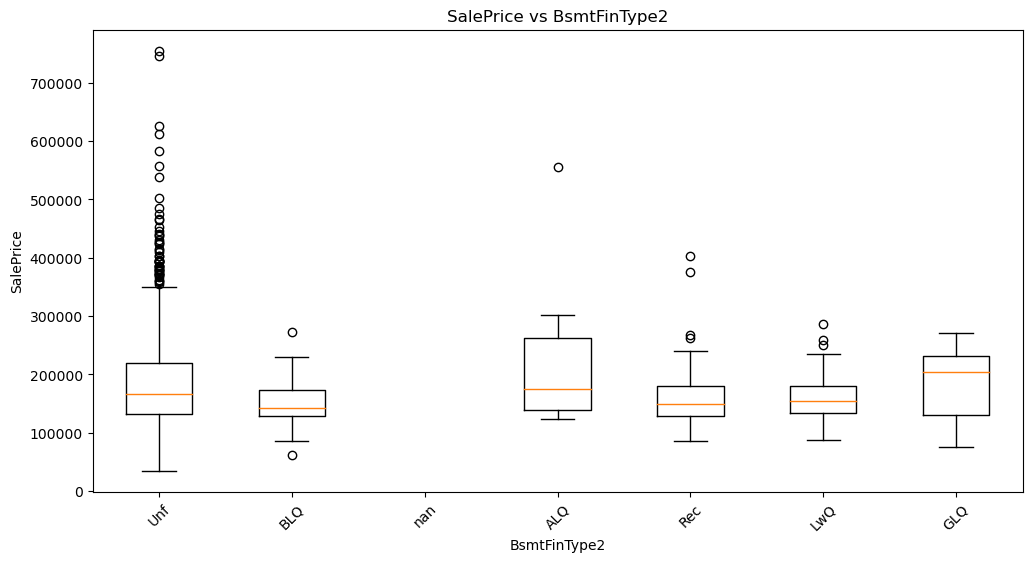

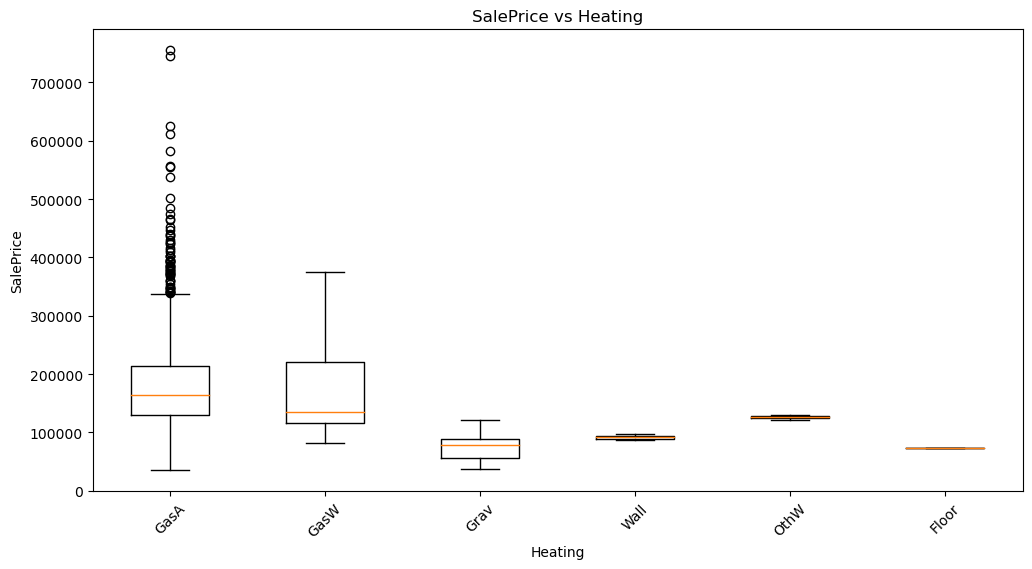

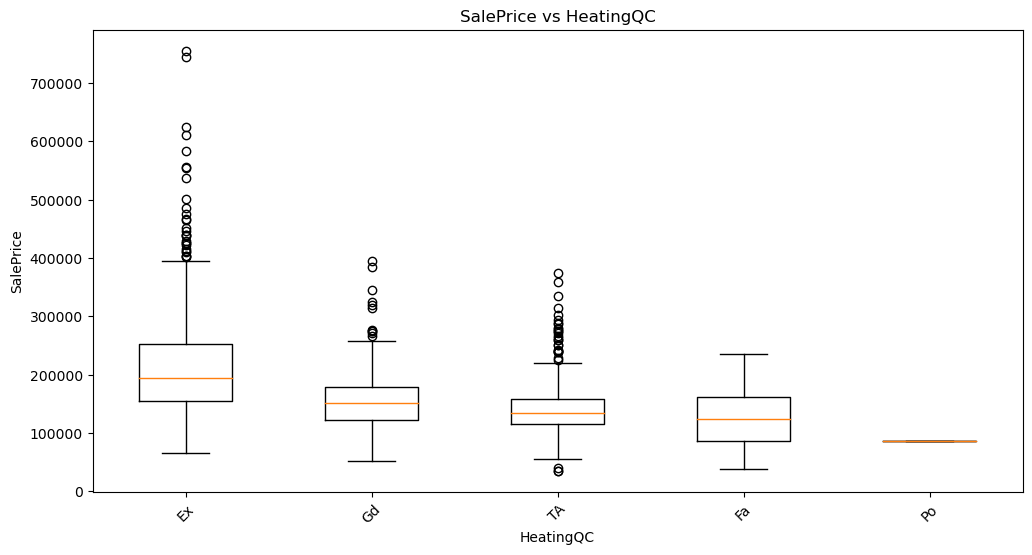

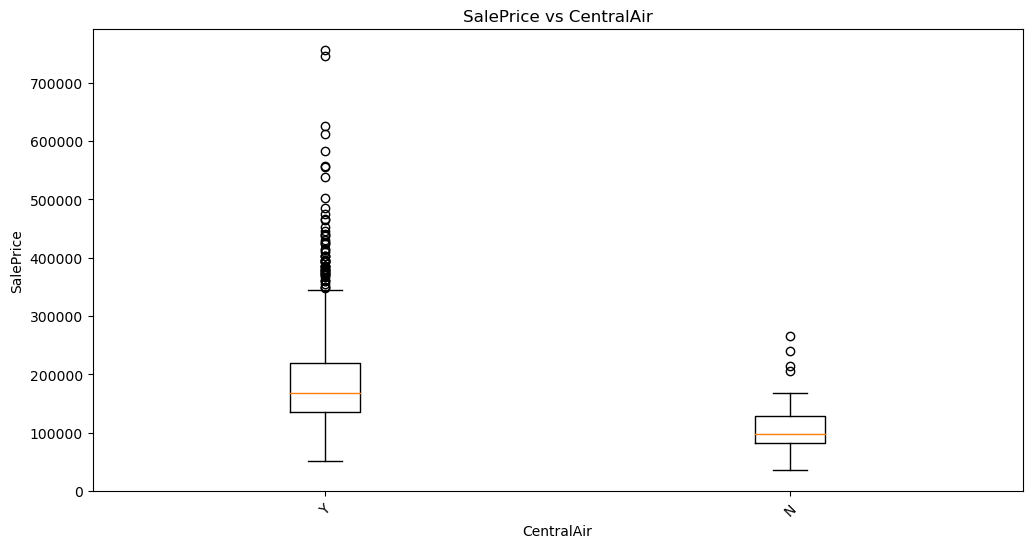

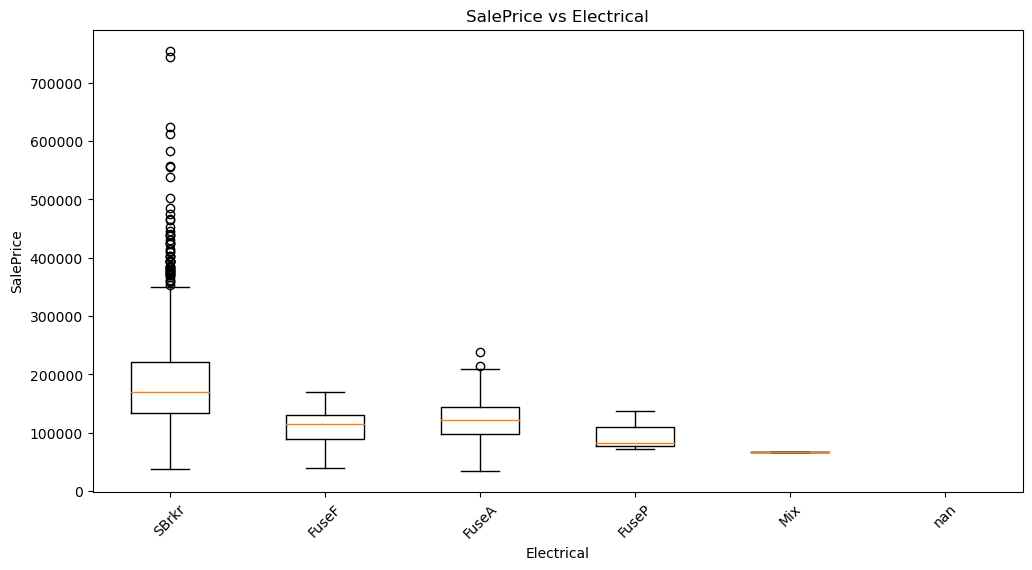

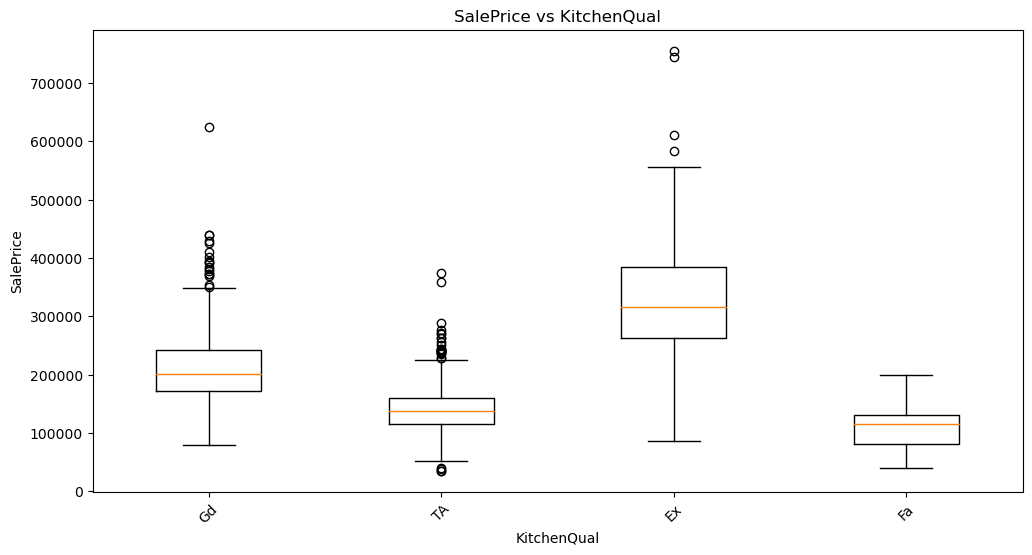

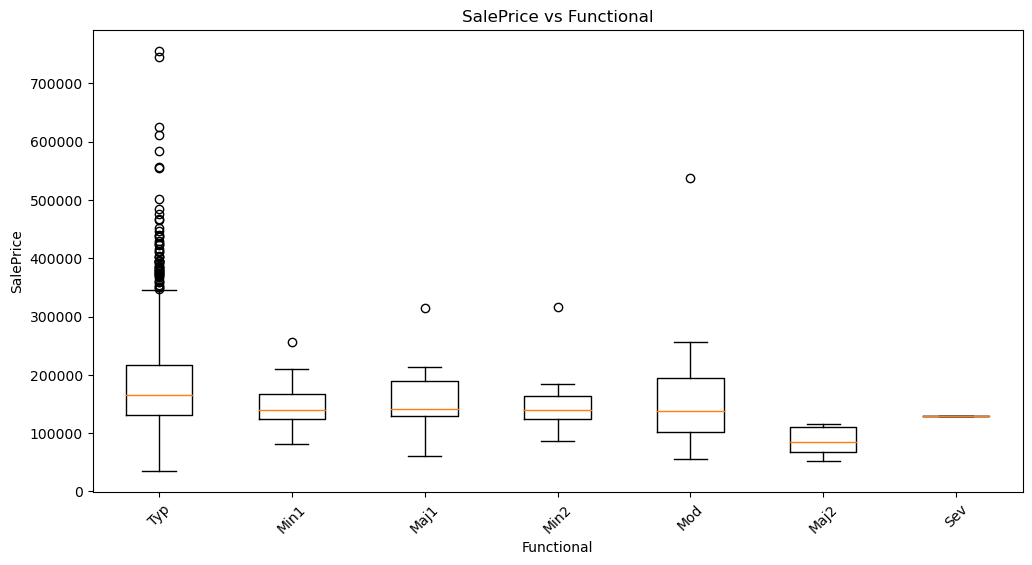

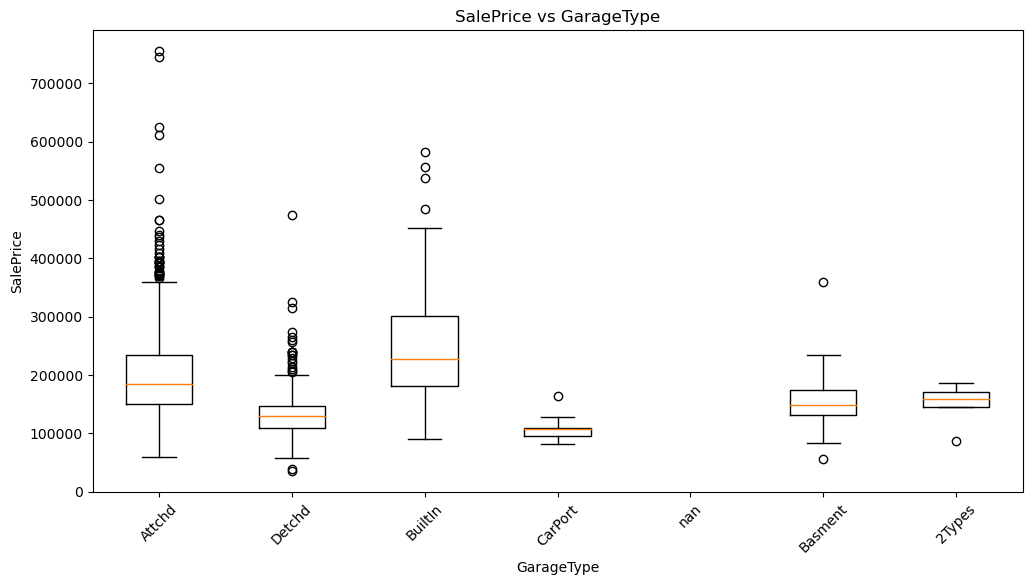

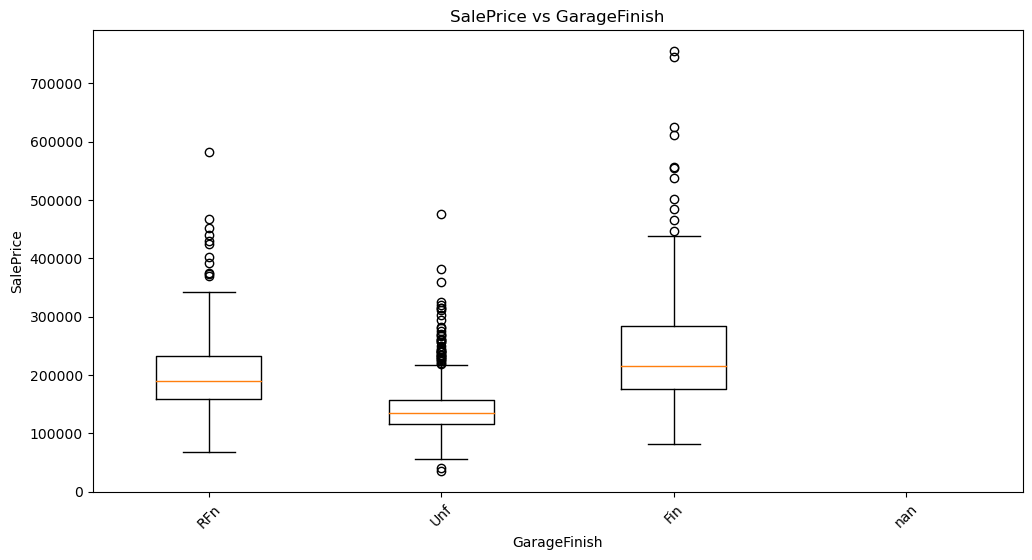

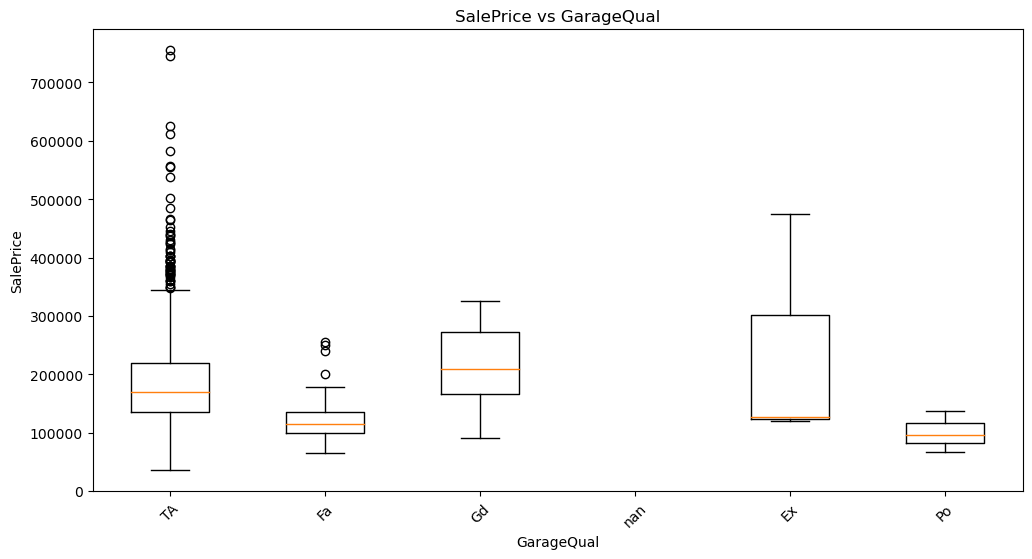

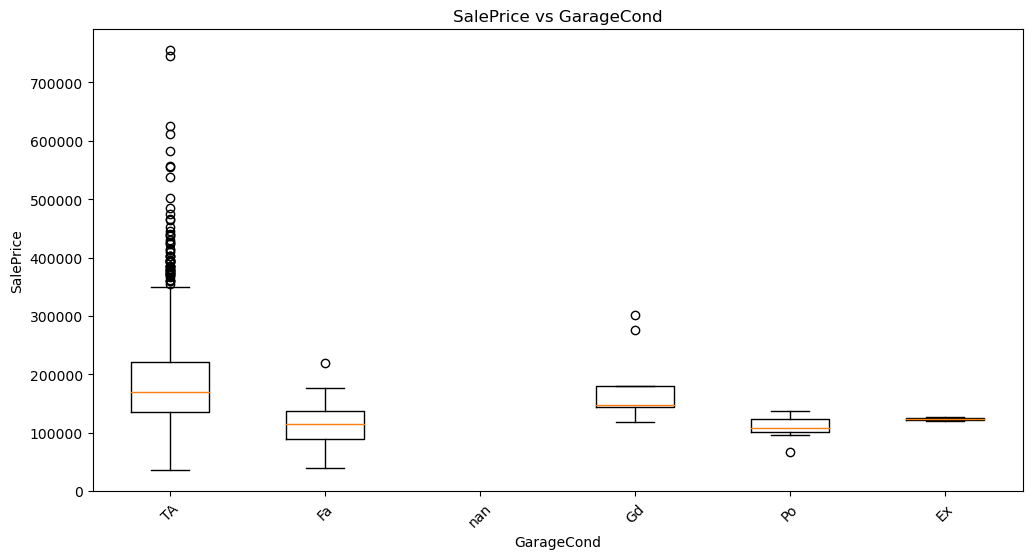

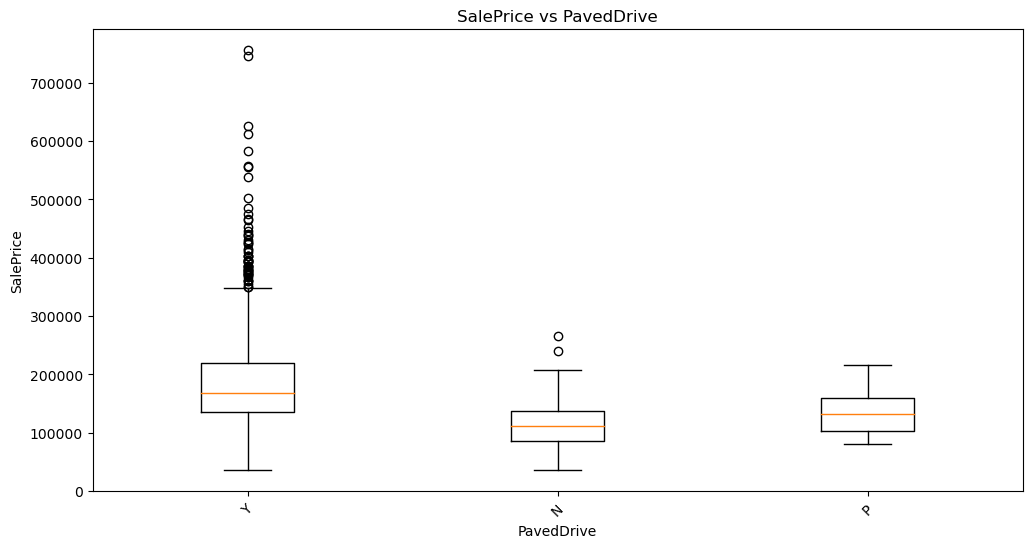

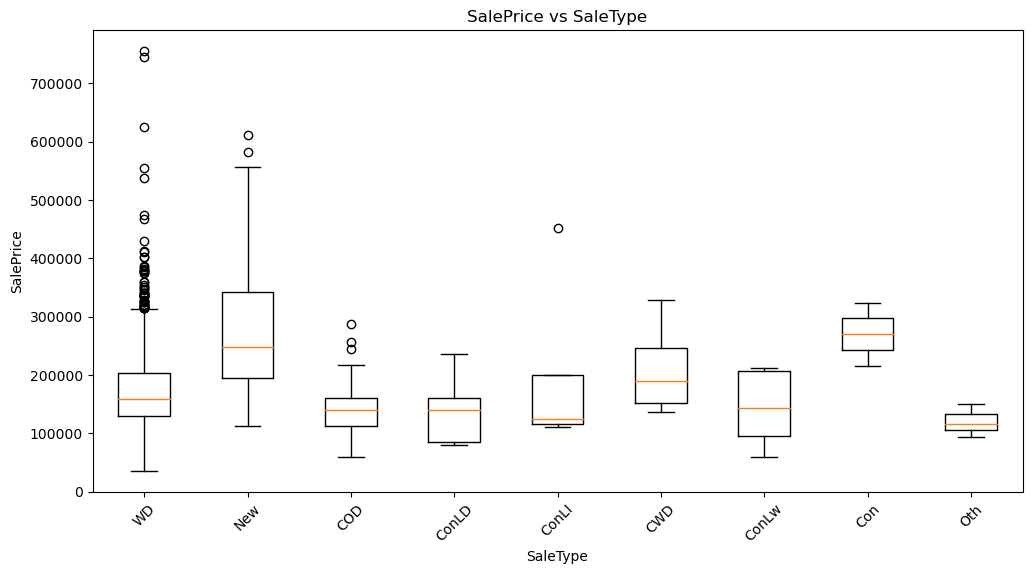

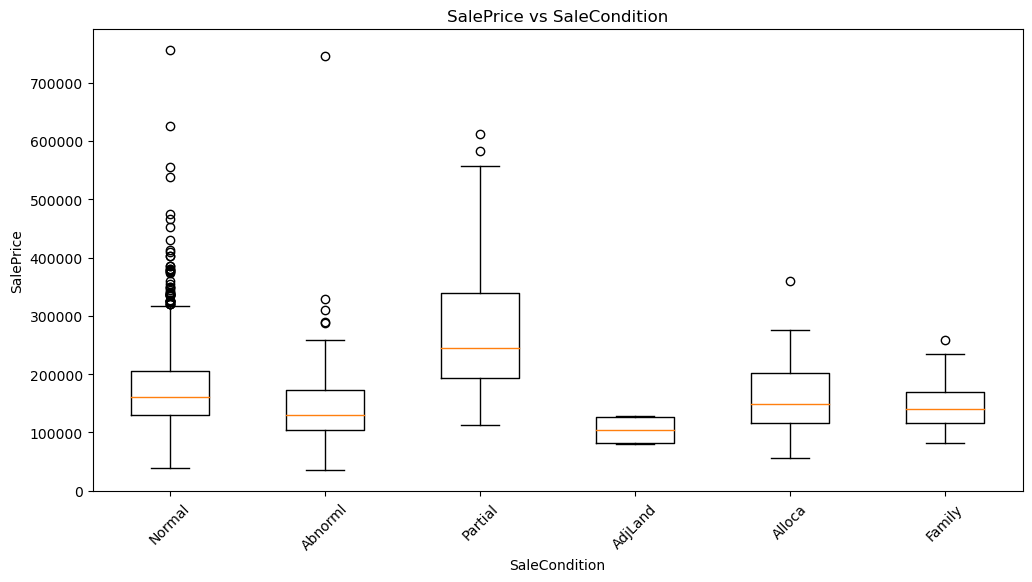

In [19]:
# Creating scatterplots of SalePrice Vs random columns
columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition' 
          ]
# Building the boxplot
for row in columns:
    plt.figure(figsize=(12,6))  # Chart size
    plt.boxplot([houses1[houses1[row] == category]['SalePrice'] for category in houses1[row].unique()],
                labels=houses1[row].unique())
    plt.title(f'SalePrice vs {row}')  # Labelling title
    plt.xlabel(row)  # Labelling x
    plt.ylabel('SalePrice')  # Labelling y
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

    # Chat GPT: I asked to group data categories within unique values. Also checked on:
    #                   ===>  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
    #          ===> https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
    # ====> https://stackoverflow.com/questions/49586471/add-new-column-to-python-pandas-dataframe-based-on-multiple-conditions

    From the above charts there isn't any special insight/obvervation except for the obvious: 
    - He younger is the house the highest the price.
    - Total rooms above grade also increase the price, as the minimun prices go up.
    - Full bathroom, from 2 to 3 there is a significant increase in the price
    - First floor squared feet, the more room built the higher the price.
    - The largest the basement the highest the price, makes sense, the more sqfeet built the more expensive.
    - Garage are doesn't seem to affect significantlly to the price, I guess the there is a set of ammenities that together 
      have a menaingfull impact on the price but by themself doesn't seem to affect too much. 
    - Overall quality, has in impact too
    - Ground living area.   

In [20]:
# Antoher way of taking a quick glance on the features that might have a meningful effect on the price.  

# Comparison of houses with the highest vs the lowest price
topmin = houses1[houses1['SalePrice'] <= houses1['SalePrice'].quantile(0.05)] # Selecting the lowest 5% house prices
topmax = houses1[houses1['SalePrice'] >= houses1['SalePrice'].quantile(0.95)] # Selecting the highest 5% houses prices

# Show all columns
pd.set_option('display.max_columns', None) 
# Sources: https://pandas.pydata.org/docs/user_guide/options.html
# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

In [21]:
# Showing statistics for the highest 5%
topmax.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,72.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000
mean,707.219178,45.821918,17928.589041,8.657534,5.219178,1998.219178,2002.986301,394.527778,1018.767123,21.082192,707.767123,1747.616438,1785.342466,627.835616,7.835616,2421.013699,0.780822,0.027397,2.123288,0.671233,3.013699,1.0,8.671233,1.260274,2000.410959,2.849315,785.589041,194.835616,87.849315,12.438356,6.260274,23.232877,7.602740,0.0,6.397260,2007.876712,411075.657534
std,393.162048,25.454394,24909.280106,0.885362,0.901335,19.238450,7.113159,323.093104,604.502769,115.642859,625.522238,456.500841,398.577652,640.347280,66.947536,592.087702,0.478614,0.164368,0.525600,0.473016,0.964554,0.0,1.700121,0.553459,12.644537,0.360217,166.521340,163.362584,66.100233,51.161505,39.609913,71.640018,64.957837,0.0,2.711804,1.363667,88470.649942
min,12.000000,20.000000,5119.000000,7.000000,2.000000,1892.000000,1965.000000,0.000000,0.000000,0.000000,32.000000,728.000000,1050.000000,0.000000,0.000000,1419.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,5.000000,0.000000,1934.000000,2.000000,380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2006.000000,328000.000000
25%,379.000000,20.000000,11443.000000,8.000000,5.000000,1997.000000,1999.000000,161.500000,781.000000,0.000000,284.000000,1410.000000,1466.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,2.000000,0.000000,2.000000,1.0,7.000000,1.000000,1997.000000,3.000000,676.000000,97.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.000000,2007.000000,350000.000000
50%,679.000000,60.000000,13518.000000,9.000000,5.000000,2005.000000,2006.000000,345.000000,1201.000000,0.000000,474.000000,1746.000000,1792.000000,590.000000,0.000000,2364.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,9.000000,1.000000,2005.000000,3.000000,810.000000,188.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000,2008.000000,385000.000000
75%,995.000000,60.000000,14977.000000,9.000000,5.000000,2007.000000,2008.000000,636.750000,1410.000000,0.000000,989.000000,2002.000000,2020.000000,1177.000000,0.000000,2696.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.0,10.000000,2.000000,2008.000000,3.000000,866.000000,269.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.000000,2009.000000,430000.000000
max,1438.000000,120.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2188.000000,820.000000,2336.000000,3200.000000,3228.000000,2065.000000,572.000000,4476.000000,2.000000,1.000000,3.000000,1.000000,4.000000,1.0,12.000000,3.000000,2010.000000,3.000000,1220.000000,857.000000,274.000000,291.000000,304.000000,410.000000,555.000000,0.0,12.000000,2010.000000,755000.000000


In [22]:
# Showing statistics for the lowest 5%
topmin.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,45.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0,75.000000,75.0,75.000000,75.000000,75.000000,75.000000
mean,700.320000,63.266667,6946.813333,4.20000,4.786667,1939.986667,1963.613333,23.440000,141.466667,30.133333,439.92000,611.520000,781.266667,136.586667,12.040000,929.893333,0.186667,0.0,1.053333,0.12000,2.226667,1.053333,4.920000,0.053333,1952.000000,0.786667,214.506667,33.746667,14.986667,44.586667,0.0,1.600000,0.0,82.453333,6.053333,2008.106667,74530.493333
std,412.478735,57.277733,3422.495177,1.13899,1.544767,22.331951,19.005613,82.329798,203.464077,107.338733,336.42853,305.329081,219.302909,234.394971,66.919564,255.606516,0.392268,0.0,0.324384,0.32715,0.831367,0.226210,1.182759,0.226210,20.388276,0.776223,225.981844,74.575754,64.480563,73.585783,0.0,13.856406,0.0,421.764706,2.765098,1.371262,14080.151220
min,30.000000,20.000000,1477.000000,1.00000,1.000000,1900.000000,1950.000000,0.000000,0.000000,0.000000,0.00000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.0,0.000000,0.00000,1.000000,1.000000,2.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,30.000000,5000.000000,4.00000,4.000000,1921.000000,1950.000000,0.000000,0.000000,0.000000,128.00000,520.000000,630.000000,0.000000,0.000000,759.000000,0.000000,0.0,1.000000,0.00000,2.000000,1.000000,4.000000,0.000000,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,4.500000,2007.000000,67000.000000
50%,639.000000,30.000000,6627.000000,4.00000,5.000000,1936.000000,1950.000000,0.000000,0.000000,0.000000,525.00000,630.000000,774.000000,0.000000,0.000000,904.000000,0.000000,0.0,1.000000,0.00000,2.000000,1.000000,5.000000,0.000000,1955.000000,1.000000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,6.000000,2008.000000,80000.000000
75%,1029.500000,70.000000,9000.000000,5.00000,6.000000,1956.000000,1971.500000,0.000000,284.000000,0.000000,685.50000,776.000000,899.000000,246.000000,0.000000,1092.000000,0.000000,0.0,1.000000,0.00000,3.000000,1.000000,6.000000,0.000000,1970.000000,1.000000,322.000000,0.000000,0.000000,90.500000,0.0,0.000000,0.0,0.000000,7.000000,2009.000000,84700.000000
max,1454.000000,190.000000,18000.000000,7.00000,8.000000,2006.000000,2007.000000,408.000000,822.000000,499.000000,1276.00000,1386.000000,1411.000000,720.000000,513.000000,1774.000000,1.000000,0.0,2.000000,1.00000,5.000000,2.000000,8.000000,1.000000,1994.000000,3.000000,1248.000000,328.000000,523.000000,286.000000,0.0,120.000000,0.0,3500.000000,12.000000,2010.000000,88000.000000


    It is confirmed that there are feactures that particularly affect to the price: Year constructed, open porch, pool area. 
    It seems that what distinguish highest from lowest prices are the "amenities" or extras beyond the basics like extra 
    bathroom, having a porch, or a pool is usually a reason to have houses with highest prices.

# Feature selection

Total space built
number of bathrooms
number of bedrooms
number of livingrooms
number of kitchens
neighbourhood 


* Foundation

* ExternalQual

* MasVnrType

* Exterior2nd

* Exterior1st

* Neighborhood

* BsmtFinType1: 

* Kitchenqual

* Garage type

* Garagefinish



My features will be basedwith the premises of a basic house vs extra amenities.


### Places checked: 
    https://monirah-abdulaziz.medium.com/house-prices-data-cleaning-ec45bb960a1
    

#### Questions: 
    a) What about numer of houses sold per year?
    b) Interaction Effects: Investigate how combinations of features interact to affect the SalePrice. For example, what is the combined effect of 'GrLivArea' and 'OverallQual'? Sometimes, the interaction between variables can be more predictive than the variables on their own.
    c) Advanced Feature Engineering: Look at creating new features from the existing ones. For instance, consider the age of the property at the time of sale ('YrSold' - 'YearBuilt'), or create a feature that represents the overall size of the house combining 'TotalBsmtSF', '1stFlrSF', and '2ndFlrSF'.
    d) Polynomial Features: Similarly, introducing polynomial features (e.g., square or cube of a given feature) could uncover non-linear relationships that are more effectively captured by a decision tree.
    